In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 18})

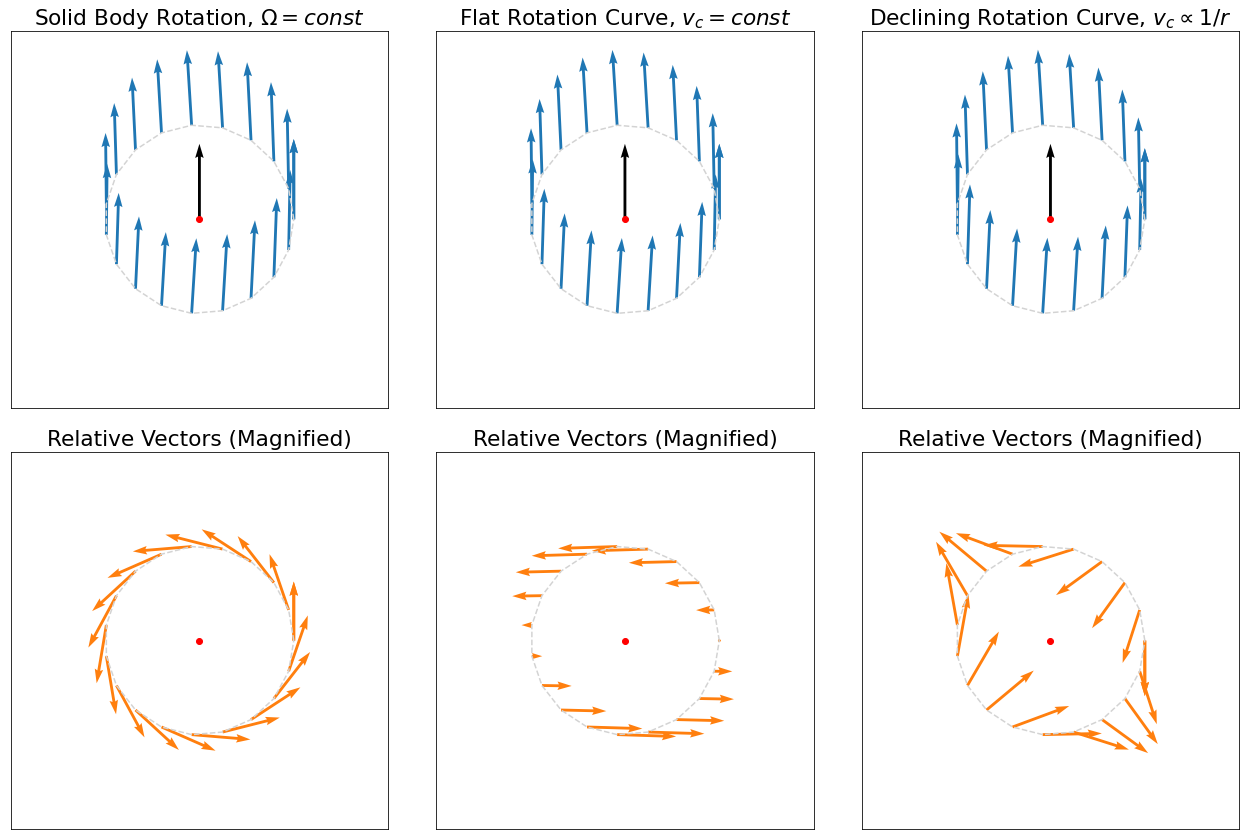

In [19]:
# Define the rotation curve models
def solid_body_rotation(R, omega=0.05):
    return omega * R

def flat_rotation_curve(R, v_const=200):
    return np.full_like(R, v_const)

def declining_rotation_curve(R, v0=200):
    return v0 / R

# Function to calculate velocity vectors and their positions
def calculate_velocity_vectors_and_positions_fixed(circle_radius, angles, v_function, R_sun):
    # Calculate positions of the points on the circle centered at (R_sun, 0)
    x_circle = circle_radius * np.cos(angles) + R_sun
    y_circle = circle_radius * np.sin(angles)

    # Calculate distances from the Galactic center (0, 0) for each point
    R_distances = np.sqrt(x_circle**2 + y_circle**2)

    # Evaluate the velocity magnitudes using the provided rotation curve
    velocities = v_function(R_distances)

    # Calculate the Sun's velocity for fixed size
    R_sun_distance = R_sun  # Distance from the Galactic center to the Sun
    v_sun = v_function(R_sun_distance)

    # Scale all vectors relative to the Sun's velocity
    scale_factor = v_sun  # Use Sun's velocity as a reference for scaling
    velocities_scaled = velocities / scale_factor

    # Calculate the direction of velocity vectors (perpendicular to radial vector from (0,0))
    radial_angles = np.arctan2(y_circle, x_circle)  # Angle of the radial vector from (0, 0) to each point
    vx = -velocities_scaled * np.sin(radial_angles)  # Perpendicular component: -sin for x
    vy = velocities_scaled * np.cos(radial_angles)   # Perpendicular component: cos for y

    return x_circle, y_circle, vx, vy, v_sun

# Parameters for the plot
R_sun = 8.0  # Sun's distance from the Galactic center in kpc
circle_radius = 0.5  # Radius of the circle around the Sun in kpc
n_points = 20  # Number of velocity vectors to display
angles = np.linspace(0, 2 * np.pi, n_points)  # Angle positions around the Sun

# Rotation models
models = [
    (solid_body_rotation, "Solid Body Rotation, $\Omega=const$"),
    (flat_rotation_curve, "Flat Rotation Curve, $v_c=const$"),
    (declining_rotation_curve, "Declining Rotation Curve, $v_c\propto1/r$")
]

# Scaling factors for the arrows
scaling_factor_top = 2.5
scaling_factor_bottom = 5

# Create the plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (model, title) in enumerate(models):
    # Calculate positions, velocity vectors, and Sun's velocity
    x_circle, y_circle, vx, vy, v_sun = calculate_velocity_vectors_and_positions_fixed(circle_radius, 
                                                                                       angles, model, R_sun)

    # Top row: Original velocity vectors with reduced size
    axes[0, i].plot(x_circle, y_circle, color='lightgrey', linestyle='--')  # Draw the circle in light grey
    axes[0, i].quiver(x_circle, y_circle, vx, vy, angles='xy', scale_units='xy', 
                      scale=scaling_factor_top, color='tab:blue')
    # Draw the Sun's velocity vector with a fixed size
    axes[0, i].quiver(R_sun, 0, 0, 1, angles='xy', scale_units='xy', 
                      scale=scaling_factor_top, color='black')
    axes[0, i].set_title(f"{title}")
    axes[0, i].plot(R_sun, 0, 'ro', label='Sun')  # Mark the Sun's position
    axes[0, i].set_xlim(R_sun - 1, R_sun + 1)
    axes[0, i].set_ylim(-1, 1)
    axes[0, i].set_aspect('equal')

    axes[0, i].set_xticks([])  # Remove x tick labels
    axes[0, i].set_yticks([])  # Remove y tick labels

    # Bottom row: Velocity vectors after subtraction at the Sun's location, with magnified arrows
    axes[1, i].plot(x_circle, y_circle, color='lightgrey', linestyle='--')  # Draw the circle in light grey
    vx_subtracted = vx  # No change in x-component
    vy_subtracted = vy - 1  # Adjust y-component to subtract the Sun's fixed velocity

    axes[1, i].quiver(x_circle, y_circle, vx_subtracted, vy_subtracted, angles='xy', 
                      scale_units='xy', scale=1/scaling_factor_bottom, color='tab:orange', label='Relative Vectors')
    axes[1, i].set_title("Relative Vectors (Magnified)")
    axes[1, i].set_xlim(R_sun - 1, R_sun + 1)
    axes[1, i].set_ylim(-1, 1)
    axes[1, i].set_aspect('equal')
    axes[1, i].plot(R_sun, 0, 'ro')  # Mark the Sun's position
    axes[1, i].set_xticks([])  # Remove x tick labels
    axes[1, i].set_yticks([])  # Remove y tick labels

# Adjust layout for better visibility and spacing
plt.tight_layout()

plt.savefig("../Figures/oort_constants_vorticity.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')


plt.show()

In [6]:
# Define a function to compute A and B constants for each model
def compute_A_and_B(R, v_function):
    # Compute the velocity v and angular velocity Omega at radius R
    v = v_function(R)
    Omega = v / R
    
    # Compute the derivative dv/dR using a finite difference approximation
    delta_R = 1e-3  # Small increment for numerical derivative
    dv_dR = (v_function(R + delta_R) - v_function(R - delta_R)) / (2 * delta_R)
    
    # Compute A and B using the given formulas
    A = 0.5 * (v / R - dv_dR)
    B = -0.5 * (v / R + dv_dR)
    
    return A, B

# Compute A and B at the Sun's distance (R_sun) for each model
results = {}
for model, name in models:
    A, B = compute_A_and_B(R_sun, model)
    results[name] = (A, B)

# Display the results
for name, (A, B) in results.items():
    print(f"{name}: A = {A:.5f}, B = {B:.5f}")


Solid Body Rotation: A = 0.00000, B = -0.05000
Flat Rotation Curve: A = 12.50000, B = -12.50000
Declining Rotation Curve: A = 3.12500, B = 0.00000
